In [1]:
import numpy as np
import os
from measurement import *
from analysis2 import *
from beta_vs_radius_plot import CompactFiberSolver
import matplotlib.pyplot as plt
import pandas as pd

# Measured tilt
Z: $\tan \beta = (35.2 - 41.6) / 100 = -0.064$

XY: $\tan \alpha = (63.5 - 61.2) / 100 = 0.023$

# See modulation reproducibility
Let us use the data of X = 0 in 250917: radial dependence
- SNOM_interface\data\20250918_144843_test
- SNOM_interface\data\500ms_100times_final_x63.80_.npy 

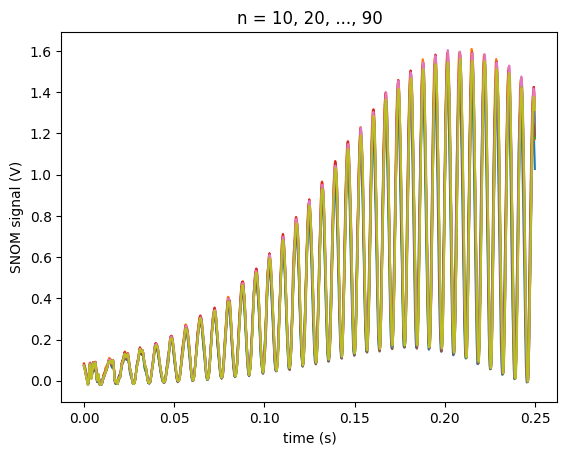

In [2]:
t_start = 0.0
t_end = 0.25
t_scan = 0.5
for n in np.array([10, 20, 30, 40, 50, 60, 70, 80, 90]):
    x, y = load_data("data/500ms_100times_final_x63.80_.npy", 0, t_start + n*t_scan, t_end + n*t_scan)
    plt.plot(x - n*t_scan, y)
plt.title("n = 10, 20, ..., 90")
plt.xlabel("time (s)")
plt.ylabel("SNOM signal (V)")
plt.show()

# R scan data

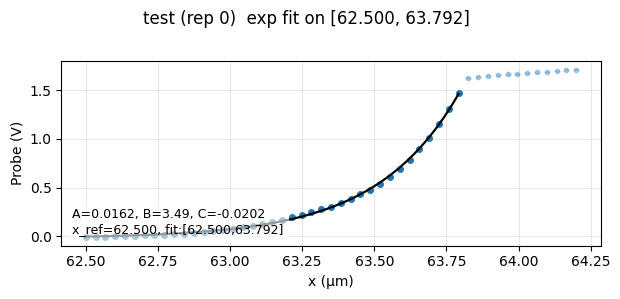

[ 1.62290369e-02  3.49416562e+00 -2.02214713e-02  6.25000000e+01]


In [13]:
path = "data/20250918_144843_test/20250918_144843_test_x.npz"
res_ana = analyze_exp(path, show=True, plot_channels=["probe"], x_range=(62.5, 63.8))

print(res_ana["popt"])

Ax = res_ana["popt"][0]
Bx = res_ana["popt"][1]
Cx = res_ana["popt"][2]
x_ref = res_ana["popt"][3]

# at z = 36.8 um
def I_x(x):
    return Ax * np.exp(Bx * (x - x_ref)) + Cx

# Z scan data

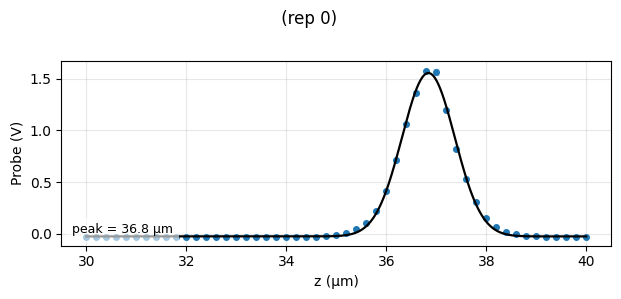

[ 1.57769551e+00  3.68427864e+01  5.27748581e-01 -2.47838535e-02]


In [12]:
path = "data/20250918_144803_/20250918_144803__z.npz"
res_ana = analyze_gaussian(path, show=True, plot_channels=["probe"])

print(res_ana["popt"])
Az = res_ana["popt"][0]
x0 = res_ana["popt"][1]
sigma = res_ana["popt"][2]
Cz = res_ana["popt"][3]

# at x = 63.8 um
def I_z(z):
    return Az * np.exp(-((z - x0) ** 2) / (2 * sigma ** 2)) + Cz

# Reconstruct XZ distribution

In [40]:
def I_xz(x, z):
    I_max = I_z(36.8)
    I_val = I_max * I_z(z)/I_max * I_x(x)/I_max
    return np.minimum(I_val, I_max)

# Cut along tilt line

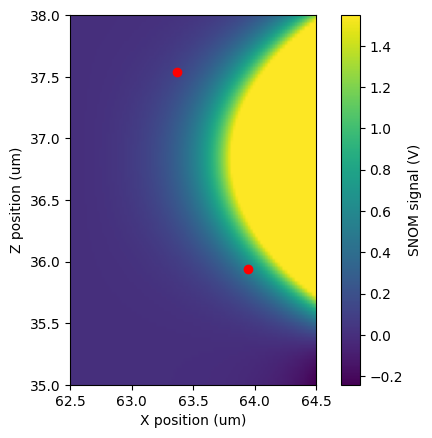

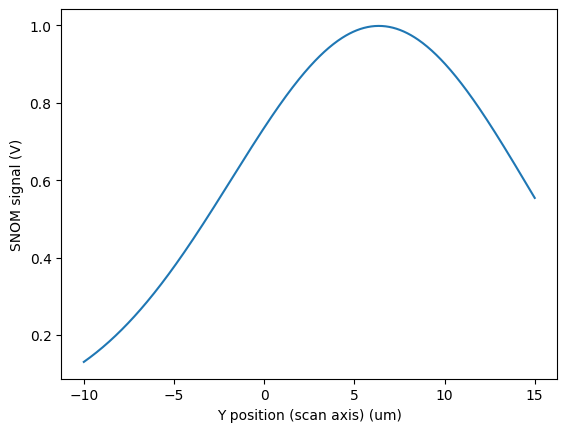

In [62]:
theta_x = np.deg2rad(1.32)
theta_z = np.deg2rad(-3.66)

x_c, z_c = 63.6, 36.9
y = np.linspace(-10, 15, 500)

x_line = x_c + y * np.tan(theta_x)
z_line = z_c + y * np.tan(theta_z)

x_start, z_start = x_line[0], z_line[0]
x_end, z_end = x_line[-1], z_line[-1]
plt.plot([x_start, x_end], [z_start, z_end], 'ro')

x, z = np.meshgrid(np.linspace(62.5, 64.5, 100), np.linspace(35, 38, 100))
I = I_xz(x, z)
plt.imshow(I, extent=(62.5, 64.5, 35, 38), origin='lower')
plt.colorbar(label='SNOM signal (V)')
plt.xlabel('X position (um)')
plt.ylabel('Z position (um)')
plt.show()

I_line = I_xz(x_line, z_line)

plt.plot(y, I_line)
plt.xlabel("Y position (scan axis) (um)")
plt.ylabel("SNOM signal (V)")
plt.show()

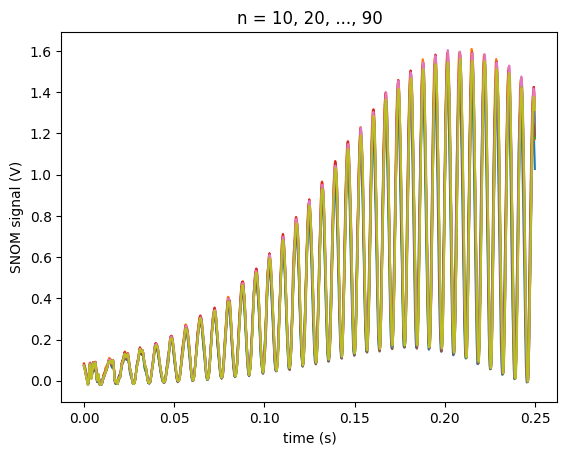

In [27]:
t_start = 0.0
t_end = 0.25
t_scan = 0.5
for n in np.array([10, 20, 30, 40, 50, 60, 70, 80, 90]):
    x, y = load_data("data/500ms_100times_final_x63.80_.npy", 0, t_start + n*t_scan, t_end + n*t_scan)
    plt.plot(x - n*t_scan, y)
plt.title("n = 10, 20, ..., 90")
plt.xlabel("time (s)")
plt.ylabel("SNOM signal (V)")
plt.show()